<a href="https://colab.research.google.com/github/OsirisEscaL/Parkinson_Project/blob/main/Models_Parkinson_HereditaryAtaxias_Sampling_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours, NeighbourhoodCleaningRule

In [ ]:
methods = [
    ("Random Over Sampler", RandomOverSampler(sampling_strategy='auto', random_state=42)),
    ("SMOTE", SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)),
    ("ADASYN", ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)),
    ("BorderlineSMOTE", BorderlineSMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5, m_neighbors=10)),
    ("SVMSMOTE", SVMSMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5, m_neighbors=10)),
    ("KMeansSMOTE", KMeansSMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2, cluster_balance_threshold=0.01)),
    ("Random Under Sampler", RandomUnderSampler(sampling_strategy='auto', random_state=42)),
    ("Tomek Links", TomekLinks(sampling_strategy='auto')),
    ("EditedNearestNeighbours", EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3)),
    ("NeighbourhoodCleaningRule", NeighbourhoodCleaningRule(sampling_strategy='auto', n_neighbors=3))
]

In [ ]:
rng = np.random.default_rng(seed=42)
random = rng.integers(10000, size=50)

In [ ]:
model = LogisticRegression(max_iter=1000, random_state = 42)

In [ ]:
ds = pd.read_csv('Parkinson_HeredetaryAtaxias.csv')
ds = ds.drop(['Unnamed: 0'], axis=1)
X = ds.iloc[:, 0:-1].values
y = ds.iloc[:, -1].values

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
results = {}
results_raw = {}

for method_name, method in methods:
    sample_x, sample_y = method.fit_resample(scaled_X, y)
    modelaccuracy = []
    modelprecision = []
    modelsensitivity = []
    modelspecificity = []
    modelbalanced_accuracy = []
    modelf1 = []
    modelroc_auc = []
    for num in random:
        skfaccuracy = []
        skfprecision = []
        skfsensitivity = []
        skfspecificity = []
        skfbalanced_accuracy = []
        skff1 = []
        skfroc_auc = []
        stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=num)
        for train_index, test_index in stratified_kfold.split(sample_x,sample_y):
            X_train, X_test = sample_x[train_index], sample_x[test_index]
            y_train, y_test = sample_y[train_index], sample_y[test_index]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, zero_division=1)
            sensitivity = recall_score(y_test, y_pred, average='binary', pos_label=1)
            specificity = recall_score(y_test, y_pred, average='binary', pos_label=0)
            balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)
            skfaccuracy.append(accuracy)
            skfprecision.append(precision)
            skfsensitivity.append(sensitivity)
            skfspecificity.append(specificity)
            skfbalanced_accuracy.append(balanced_accuracy)
            skff1.append(f1)
            skfroc_auc.append(roc_auc)
        modelaccuracy.append(np.mean(skfaccuracy))
        modelprecision.append(np.mean(skfprecision))
        modelsensitivity.append(np.mean(skfsensitivity))
        modelspecificity.append(np.mean(skfspecificity))
        modelbalanced_accuracy.append(np.mean(skfbalanced_accuracy))
        modelf1.append(np.mean(skff1))
        modelroc_auc.append(np.mean(skfroc_auc))
    mean_accuracy = np.mean(modelaccuracy)
    mean_precision = np.mean(modelprecision)
    mean_sensitivity = np.mean(modelsensitivity)
    mean_specificity = np.mean(modelspecificity)
    mean_balanced_accuracy = np.mean(modelbalanced_accuracy)
    mean_f1 = np.mean(modelf1)
    mean_roc_auc = np.mean(modelroc_auc)
    std_accuracy = np.std(modelaccuracy)
    std_precision = np.std(modelprecision)
    std_sensitivity = np.std(modelsensitivity)
    std_specificity = np.std(modelspecificity)
    std_balanced_accuracy = np.std(modelbalanced_accuracy)
    std_f1 = np.std(modelf1)
    std_roc_auc = np.std(modelroc_auc)
    results_raw[method_name] = {'Balanced_Accuracy': modelbalanced_accuracy,
                                'Accuracy': modelaccuracy,
                                'Precision': modelprecision,
                                'Sensitivity': modelsensitivity,
                                'Specificity': modelspecificity,
                                'F1': modelf1,
                                'ROC_AUC': modelroc_auc}
    results[method_name] = {'Mean_Balanced_Accuracy': mean_balanced_accuracy,
                            'Std_Balanced_Accuracy': std_balanced_accuracy,
                            'Mean_Accuracy': mean_accuracy, 'Std_Accuracy': std_accuracy,
                            'Mean_Precision': mean_precision, 'Std_Precision': std_precision,
                            'Mean_Sensitivity': mean_sensitivity, 'Std_Sensitivity': std_sensitivity,
                            'Mean_Specificity': mean_specificity, 'Std_Specificity': std_specificity,
                            'Mean_F1': mean_f1, 'Std_F1': std_f1,
                            'Mean_ROC_AUC': mean_roc_auc, 'Std_ROC_AUC': std_roc_auc}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
results_raw_ds = pd.DataFrame(results_raw)
results_raw_ds.to_csv('Results_Raw_Model_Parkinson_HeredetaryAtaxias.csv')
results_raw_ds

,Random Over Sampler,SMOTE,ADASYN,BorderlineSMOTE,SVMSMOTE,KMeansSMOTE,Random Under Sampler,Tomek Links,EditedNearestNeighbours,NeighbourhoodCleaningRule
Balanced_Accuracy,"[0.8099999999999999, 0.809090909090909, 0.8400...","[0.8290909090909089, 0.7927272727272727, 0.870...","[0.8672727272727274, 0.8034848484848485, 0.85,...","[0.82, 0.8018181818181818, 0.8690909090909091,...","[0.7583441558441557, 0.8003246753246753, 0.815...","[0.8390909090909089, 0.8227272727272726, 0.850...","[0.5083333333333333, 0.55, 0.5249999999999999,...","[0.6133333333333334, 0.585, 0.5316666666666666...","[0.6523809523809524, 0.6273809523809523, 0.673...","[0.713095238095238, 0.6422619047619047, 0.7113..."
Accuracy,"[0.8108225108225108, 0.8103896103896103, 0.840...","[0.8303030303030303, 0.7913419913419913, 0.868...","[0.8727272727272728, 0.8090909090909092, 0.854...","[0.8207792207792208, 0.8017316017316016, 0.867...","[0.7555555555555555, 0.7888888888888889, 0.811...","[0.841125541125541, 0.8229437229437229, 0.8506...","[0.5238095238095238, 0.5523809523809524, 0.533...","[0.7351648351648352, 0.701098901098901, 0.6549...","[0.696969696969697, 0.6984848484848485, 0.7681...","[0.7781818181818181, 0.72, 0.7799999999999999,..."
Precision,"[0.8539393939393939, 0.888888888888889, 0.9277...","[0.886984126984127, 0.8964285714285716, 0.9214...","[1.0, 0.9019841269841269, 0.9714285714285715, ...","[0.9178571428571429, 0.9164141414141416, 0.980...","[0.8433333333333334, 0.9054545454545455, 0.911...","[0.9173737373737374, 0.8833333333333332, 0.912...","[0.45, 0.5366666666666667, 0.5166666666666666,...","[0.7924242424242425, 0.7924242424242425, 0.759...","[0.8168831168831169, 0.7695238095238095, 0.800...","[0.8155555555555555, 0.7733333333333333, 0.813..."
Sensitivity,"[0.7690909090909092, 0.7345454545454546, 0.754...","[0.7527272727272727, 0.66, 0.8145454545454545,...","[0.7345454545454546, 0.6781818181818182, 0.718...","[0.6945454545454546, 0.6781818181818182, 0.756...","[0.7345454545454546, 0.7363636363636363, 0.774...","[0.7527272727272727, 0.738181818181818, 0.7763...","[0.55, 0.6333333333333333, 0.4666666666666666,...","[0.86, 0.8200000000000001, 0.78, 0.86, 0.76, 0...","[0.7714285714285715, 0.8214285714285715, 0.896...","[0.8928571428571429, 0.8678571428571429, 0.889..."
Specificity,"[0.850909090909091, 0.8836363636363636, 0.9254...","[0.9054545454545455, 0.9254545454545454, 0.925...","[1.0, 0.9287878787878789, 0.9818181818181818, ...","[0.9454545454545455, 0.9254545454545454, 0.981...","[0.7821428571428571, 0.8642857142857142, 0.857...","[0.9254545454545454, 0.9072727272727272, 0.925...","[0.4666666666666667, 0.4666666666666666, 0.583...","[0.3666666666666666, 0.35, 0.2833333333333333,...","[0.5333333333333333, 0.4333333333333333, 0.45,...","[0.5333333333333333, 0.41666666666666663, 0.53..."
F1,"[0.800103519668737, 0.7996257908197603, 0.8244...","[0.8124546660769572, 0.7577777777777777, 0.861...","[0.8422305764411029, 0.773250773993808, 0.8212...","[0.7876554130424098, 0.7703683897801544, 0.849...","[0.781417311394428, 0.8057159833630422, 0.8333...","[0.8208766122078816, 0.8031578947368422, 0.836...","[0.490952380952381, 0.5785714285714285, 0.4871...","[0.8232854864433812, 0.7942640692640693, 0.763...","[0.7751243493348756, 0.788954248366013, 0.8413...","[0.8442063492063492, 0.8113725490196078, 0.844..."
ROC_AUC,"[0.8099999999999999, 0.809090909090909, 0.8400...","[0.8290909090909089, 0.7927272727272727, 0.869...","[0.8672727272727274, 0.8034848484848485, 0.85,...","[0.82, 0.8018181818181818, 0.8690909090909091,...","[0.7583441558441559, 0.8003246753246753, 0.815...","[0.8390909090909089, 0.8227272727272726, 0.850...","[0.5083333333333334, 0.55, 0.525, 0.5333333333...","[0.6133333333333334, 0.5850000000000001, 0.531...","[0.6523809523809525, 0.6273809523809524, 0.673...","[0.7130952380952381, 0.6422619047619048, 0.711..."


In [ ]:
results_ds = pd.DataFrame(results).T
results_ds.to_csv('Results_Model_Parkinson_HeredetaryAtaxias.csv')
results_ds

,Mean_Balanced_Accuracy,Std_Balanced_Accuracy,Mean_Accuracy,Std_Accuracy,Mean_Precision,Std_Precision,Mean_Sensitivity,Std_Sensitivity,Mean_Specificity,Std_Specificity,Mean_F1,Std_F1,Mean_ROC_AUC,Std_ROC_AUC
Random Over Sampler,0.850400,0.025993,0.850390,0.025865,0.945398,0.040479,0.751818,0.033566,0.948982,0.040966,0.828549,0.027566,0.850400,0.025993
SMOTE,0.834255,0.024057,0.834459,0.023879,0.900762,0.030211,0.762873,0.039927,0.905636,0.030548,0.817382,0.028661,0.834255,0.024057
ADASYN,0.853009,0.025177,0.856909,0.025049,0.951484,0.035176,0.747382,0.039133,0.958636,0.031126,0.829447,0.030013,0.853009,0.025177
BorderlineSMOTE,0.841891,0.029411,0.841931,0.029026,0.934005,0.037437,0.744800,0.037329,0.938982,0.035284,0.819774,0.033640,0.841891,0.029411
SVMSMOTE,0.815581,0.027682,0.806000,0.027416,0.901636,0.029817,0.763091,0.036703,0.868071,0.040591,0.817844,0.027467,0.815581,0.027682
KMeansSMOTE,0.837927,0.018099,0.838450,0.017829,0.900854,0.019955,0.763709,0.032115,0.912145,0.019346,0.819085,0.022677,0.837927,0.018099
Random Under Sampler,0.538500,0.064029,0.536095,0.063074,0.545133,0.088512,0.562333,0.110444,0.514667,0.073078,0.520084,0.086434,0.538500,0.064029
Tomek Links,0.568200,0.040975,0.697209,0.031731,0.782577,0.021402,0.828400,0.035573,0.308000,0.074105,0.799612,0.024583,0.568200,0.040975
EditedNearestNeighbours,0.646940,0.037550,0.724364,0.033768,0.782592,0.023931,0.845214,0.041297,0.448667,0.065391,0.807104,0.027195,0.646940,0.037550
NeighbourhoodCleaningRule,0.661714,0.044441,0.725782,0.040143,0.785433,0.029080,0.838429,0.043959,0.485000,0.065596,0.803155,0.032623,0.661714,0.044441


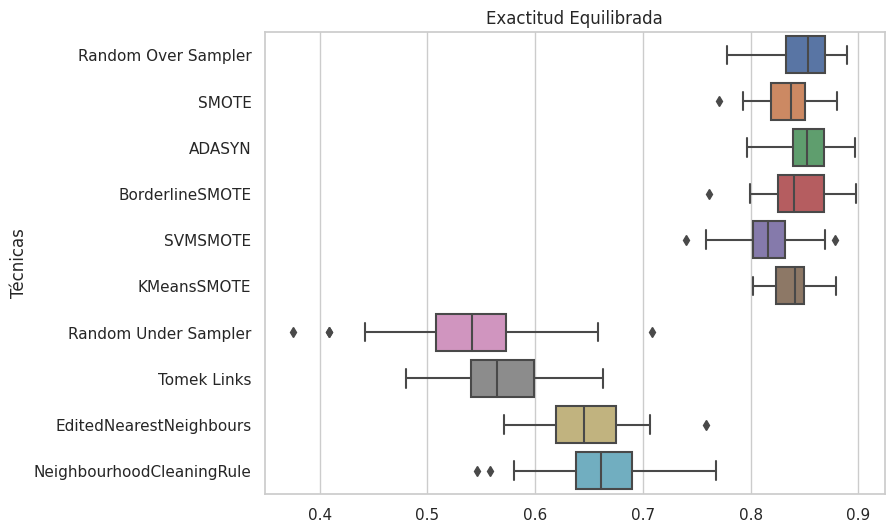

In [ ]:
balanced_accuracy = pd.DataFrame(results_raw_ds.loc['Balanced_Accuracy'])
modelos = balanced_accuracy.index

plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.boxplot(data=balanced_accuracy['Balanced_Accuracy'], orient='h')
plt.title('Exactitud Equilibrada')
plt.ylabel('Técnicas')
plt.gca().set_yticklabels(modelos)
plt.savefig('Boxplot_Sampling_Balanced_Accuracy_Parkinson_HeredetaryAtaxias.png', dpi=300, bbox_inches='tight')
plt.show()

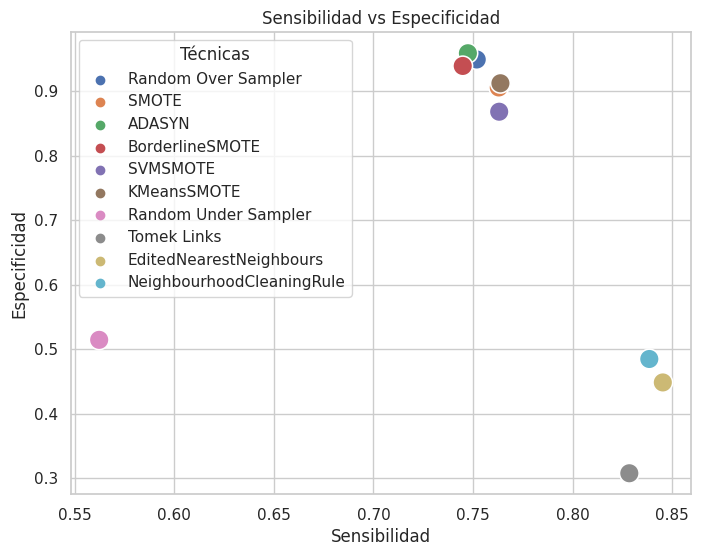

In [ ]:
modelos = results_ds.index
results_ds.insert(0, 'Técnicas', modelos)

plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.scatterplot(x='Mean_Sensitivity', y='Mean_Specificity', data=results_ds, hue = 'Técnicas', s=200)
plt.title('Sensibilidad vs Especificidad')
plt.xlabel('Sensibilidad')
plt.ylabel('Especificidad')
plt.savefig('Scatterplot_Sampling_Sensitivity_Specificity_Parkinson_HeredetaryAtaxias.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import scipy.stats as stats

samplers = ['Random Over Sampler', 'SMOTE', 'ADASYN', 'BorderlineSMOTE',
            'SVMSMOTE', 'KMeansSMOTE', 'Random Under Sampler', 'Tomek Links',
            'EditedNearestNeighbours', 'NeighbourhoodCleaningRule']

comparison = {}
alpha = 0.05
for sample1 in samplers:
  val1 = results_raw_ds.loc['Balanced_Accuracy', sample1]
  for sample2 in samplers:
    val2 = results_raw_ds.loc['Balanced_Accuracy', sample2]
    statistic, p_value = stats.mannwhitneyu(val1, val2, alternative="greater")
    if p_value < alpha:
      greater = 'La primera muestra es significativamente mayor que la segunda.'
      comparison[sample1, sample2] = {'statistic': statistic,
                                        'p_value': p_value,
                                        'greater': greater}

In [ ]:
comparison = pd.DataFrame(comparison).T
comparison.to_csv('Results_MannWhitneyU_Sampler_Parkinson_HeredetaryAtaxias.csv')
comparison

statistic   p_value  \
Random Over Sampler       SMOTE                        1705.5  0.000852   
                          SVMSMOTE                     2053.0       0.0   
                          KMeansSMOTE                  1659.0  0.002425   
                          Random Under Sampler         2500.0       0.0   
                          Tomek Links                  2500.0       0.0   
                          EditedNearestNeighbours      2500.0       0.0   
                          NeighbourhoodCleaningRule    2500.0       0.0   
SMOTE                     SVMSMOTE                     1735.0  0.000419   
                          Random Under Sampler         2500.0       0.0   
                          Tomek Links                  2500.0       0.0   
                          EditedNearestNeighbours      2500.0       0.0   
                          NeighbourhoodCleaningRule    2500.0       0.0   
ADASYN                    SMOTE                        1748.5  0.000298   
                          BorderlineSMOTE              1548.5  0.019962   
                          SVMSMOTE                     2109.0       0.0   
                          KMeansSMOTE                  1730.0  0.000473   
                          Random Under Sampler         2500.0       0.0   
                          Tomek Links                  2500.0       0.0   
                          EditedNearestNeighbours      2500.0       0.0   
                          NeighbourhoodCleaningRule    2500.0       0.0   
BorderlineSMOTE           SVMSMOTE                     1850.0  0.000018   
                          Random Under Sampler         2500.0       0.0   
                          Tomek Links                  2500.0       0.0   
                          EditedNearestNeighbours      2500.0       0.0   
                          NeighbourhoodCleaningRule    2499.0       0.0   
SVMSMOTE                  Random Under Sampler         2500.0       0.0   
                          Tomek Links                  2500.0       0.0   
                          EditedNearestNeighbours      2499.0       0.0   
                          NeighbourhoodCleaningRule    2496.0       0.0   
KMeansSMOTE               SVMSMOTE                     1874.0  0.000009   
                          Random Under Sampler         2500.0       0.0   
                          Tomek Links                  2500.0       0.0   
                          EditedNearestNeighbours      2500.0       0.0   
                          NeighbourhoodCleaningRule    2500.0       0.0   
Tomek Links               Random Under Sampler         1645.0  0.003256   
EditedNearestNeighbours   Random Under Sampler         2328.5       0.0   
                          Tomek Links                  2306.0       0.0   
NeighbourhoodCleaningRule Random Under Sampler         2355.0       0.0   
                          Tomek Links                  2343.5       0.0   
                          EditedNearestNeighbours      1530.5  0.026783   

                                                                                               greater  
Random Over Sampler       SMOTE                      La primera muestra es significativamente mayor...  
                          SVMSMOTE                   La primera muestra es significativamente mayor...  
                          KMeansSMOTE                La primera muestra es significativamente mayor...  
                          Random Under Sampler       La primera muestra es significativamente mayor...  
                          Tomek Links                La primera muestra es significativamente mayor...  
                          EditedNearestNeighbours    La primera muestra es significativamente mayor...  
                          NeighbourhoodCleaningRule  La primera muestra es significativamente mayor...  
SMOTE                     SVMSMOTE                   La primera muestra es significativamente mayor...  
                          Rando

In [ ]:
val1 = results_raw_ds.loc['Balanced_Accuracy', 'ADASYN']
val2 = results_raw_ds.loc['Balanced_Accuracy', 'Random Over Sampler']
statistic, p_value = stats.mannwhitneyu(val1, val2, alternative="two-sided")

print(f"Estadística de prueba: {statistic}")
print(f"Valor p: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Hay evidencia de que las muestras tienen distribuciones diferentes.")
else:
    print("No hay evidencia suficiente para afirmar que las muestras tienen distribuciones diferentes.")

Estadística de prueba: 1287.5
Valor p: 0.7986425822939219
No hay evidencia suficiente para afirmar que las muestras tienen distribuciones diferentes.
